In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ice_cream_products = pd.read_csv('combined_products.csv')
ice_cream_reviews = pd.read_csv('combined_reviews.csv')

ice_cream_products.head()

,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


In [4]:
ice_cream_products.tail()

,brand,key,name,subhead,description,rating,rating_count,ingredients
236,breyers,64_breyers,CINNABON®,NaN,Calling all cinnamon roll lovers! We teamed up...,4.0,28,"MILK, CORN SYRUP, SUGAR, BROWN SUGAR, SOYBEAN ..."
237,breyers,65_breyers,CarbSmart™ Caramel Swirl Bar,NaN,Watching your grams of sugar or carbs? Try our...,4.7,18,"MILK, WATER, CARAMEL SWIRL, SUGAR, WATER, CORN..."
238,breyers,66_breyers,Layered Dessert S'mores,NaN,Calling all S'mores lovers! Make sure you don'...,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
239,breyers,67_breyers,Layered Dessert Peach Cobbler,NaN,Love peach cobbler topped with Breyers®? Then ...,3.2,38,"MILK, CORN SYRUP, ENRICHED WHEAT FLOUR, WHEAT ..."
240,breyers,68_breyers,Layered Dessert Brownie Cheesecake,NaN,Love brownie cheesecake? What about Breyers®? ...,2.8,25,"MILK, CORN SYRUP, SUGAR, ENRICHED WHEAT FLOUR,..."


In [3]:
ice_cream_reviews.head()

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients,texture,likes
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...",NaN,NaN,NaN,NaN
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,NaN,NaN,NaN,NaN
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,NaN,NaN,NaN,NaN
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,NaN,NaN,NaN,NaN
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,NaN,NaN,NaN,NaN


In [5]:
ice_cream_reviews.tail()

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients,texture,likes
21669,breyers,68_breyers,Randi,2020-04-22,1,Terrible missing the chocolate ice cream,0.0,0.0,There was no chocolate ice cream in this at al...,NaN,NaN,NaN,NaN
21670,breyers,68_breyers,Bethie,2020-09-08,1,Terrible,0.0,0.0,This ice cream has no flavor at all. No one in...,NaN,NaN,NaN,NaN
21671,breyers,68_breyers,Nshaw1994,2020-09-09,5,Flavor of the week!,0.0,0.0,Absolutely love this flavor! The only thing th...,NaN,NaN,NaN,NaN
21672,breyers,68_breyers,PamelaG,2020-06-01,5,Love this flavor!!,0.0,0.0,Brilliant combo - love the cheesecake and brow...,NaN,NaN,NaN,NaN
21673,breyers,68_breyers,Fanchon,2020-08-22,5,Great,0.0,0.0,Has a delicious taste with all natural ingredi...,NaN,NaN,NaN,NaN


# Subhead toward the end of products is mostly na, and four columns in reviews don't look like they ever have any relevance or values. 

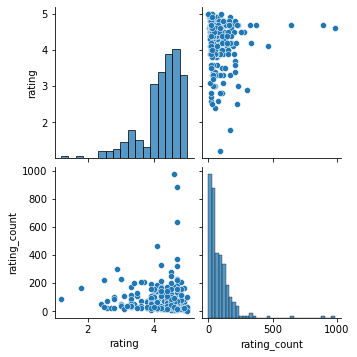

In [6]:
sns.pairplot(ice_cream_products)

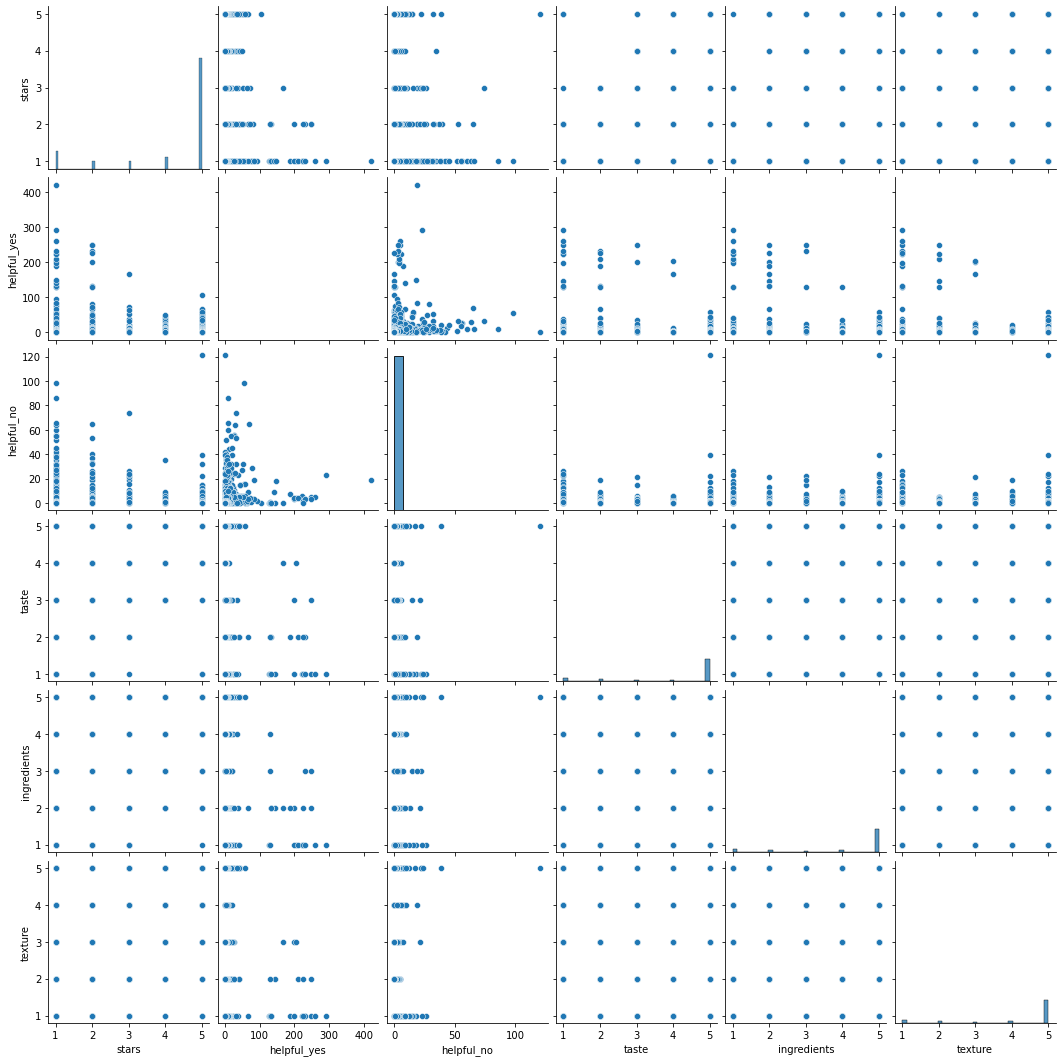

In [7]:
sns.pairplot(ice_cream_reviews)